In [2]:
import numpy as np
from scipy import misc
import imageio.v2 as imageio

damier = imageio.imread('damier-ng.jpeg')

# Save the image
imageio.imsave('damier-ng.png', damier)


In [3]:
# Load the image
paysage = imageio.imread('paysage_zen.png')

# Get the shape of the image
print(paysage.shape)

(432, 1426, 3)


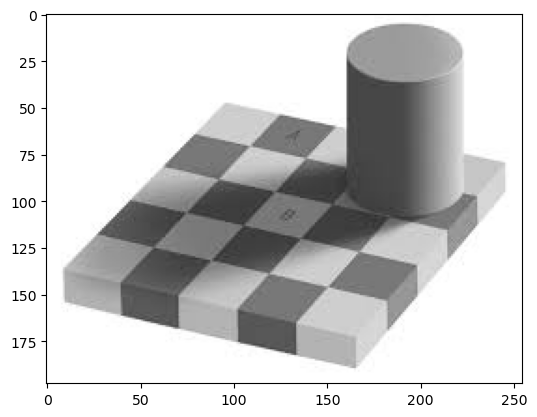

In [4]:
import matplotlib.pyplot as plt
plt.imshow(damier, cmap='gray')

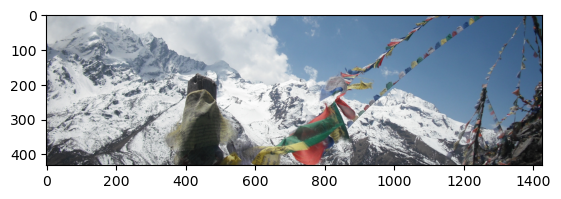

In [5]:
paysage = imageio.imread('paysage_zen.png')
plt.imshow(paysage)

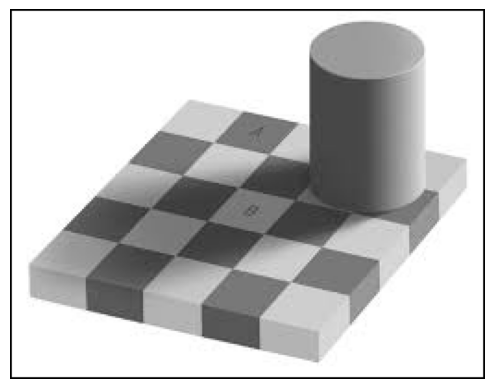

In [6]:
import cv2
import matplotlib.pyplot as plt

# Charger l'image
image = cv2.imread('damier-ng.jpeg')

# Définir la largeur du bord noir
k = 1

# Créer une image avec des bords noirs
bordered_image = cv2.copyMakeBorder(image, k, k, k, k, cv2.BORDER_CONSTANT, value=(0, 0, 0))

# Afficher l'image avec les bords noirs
plt.imshow(cv2.cvtColor(bordered_image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Supprimer les axes
plt.show()

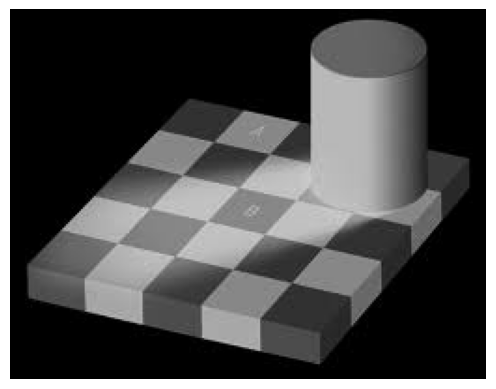

In [7]:
import cv2
import matplotlib.pyplot as plt

# Charger l'image
image = cv2.imread('damier-ng.jpeg')

# Inverser les couleurs de l'image
inverted_image = cv2.bitwise_not(image)

# Afficher l'image inversée
plt.imshow(cv2.cvtColor(inverted_image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Supprimer les axes
plt.show()

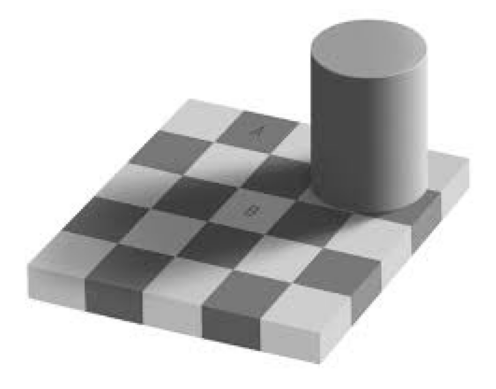

In [8]:
import cv2
import matplotlib.pyplot as plt

# Charger l'image
image = cv2.imread('damier-ng.jpeg')

# Créer un masque blanc sous forme d'un rectangle
mask = image.copy()  # Copier l'image pour créer le masque
rectangle_color = (255, 255, 255)  # Couleur blanche pour le rectangle
start_point = (100, 100)  # Coin supérieur gauche du rectangle
end_point = (300, 200)  # Coin inférieur droit du rectangle
cv2.rectangle(mask, start_point, end_point, rectangle_color, -1)  # Dessiner le rectangle sur le masque

# Appliquer le masque à l'image originale
masked_image = cv2.bitwise_and(image, mask)

# Afficher l'image avec le masque
plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

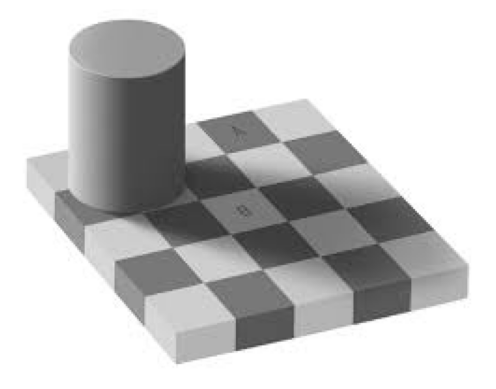

In [9]:
import cv2
import matplotlib.pyplot as plt

# Charger l'image
image = cv2.imread('damier-ng.jpeg')

# Renverser l'image horizontalement (effet miroir)
mirrored_image = cv2.flip(image, 1)

# Afficher l'image renversée
plt.imshow(cv2.cvtColor(mirrored_image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Supprimer les axes
plt.show()


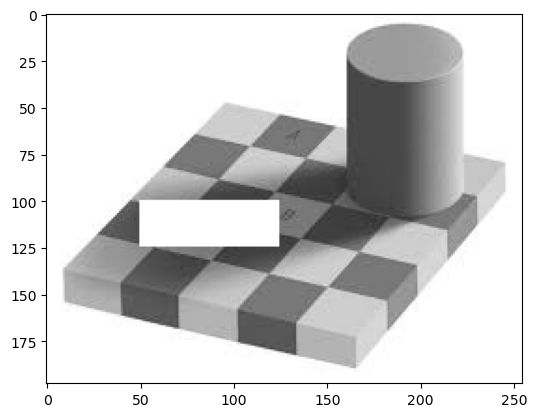

In [10]:
def masque(im,pos,lar,lon):
    im_temp = im.copy()
    im_temp[pos[0]:pos[0]+lon,pos[1]:pos[1]+lar] = 255
    return(im_temp)
plt.imshow(masque(damier,[100,50],75,25),cmap="gray")

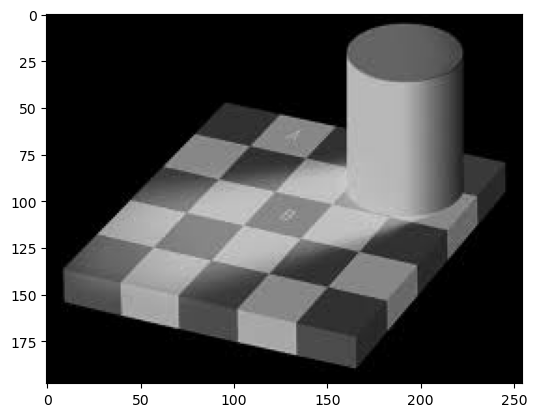

In [11]:
def inverse_intensity(im):
    im_temp = im.copy()
    im_temp = 255-im_temp    
    return(im_temp)
plt.imshow(inverse_intensity(damier),cmap="gray")

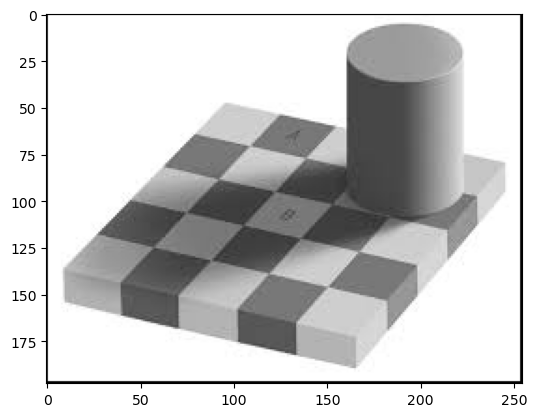

In [12]:
def bord(im,k):

    im_temp = im.copy()

    im_temp[:,:k] = 0

    im_temp[:,-k:] = 0

    im_temp[:k,:] = 0

    im_temp[-k:,:] = 0           

    return(im_temp)
 
plt.imshow(bord(damier,1),cmap="gray")

[[0.01 0.02 0.04 0.02 0.01]
 [0.02 0.04 0.08 0.04 0.02]
 [0.04 0.08 0.16 0.08 0.04]
 [0.02 0.04 0.08 0.04 0.02]
 [0.01 0.02 0.04 0.02 0.01]]


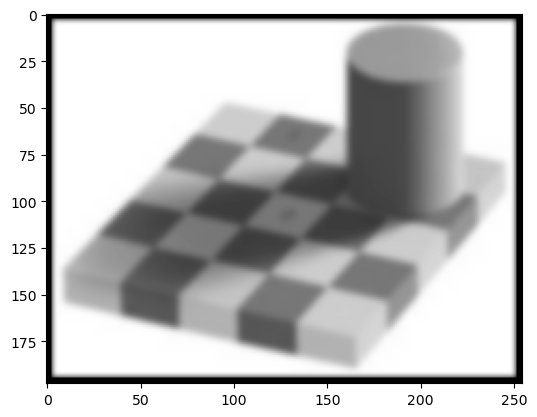

In [13]:
K = np.array([[1,2,4,2,1],[2,4,8,4,2],[4,8,16,8,4],[2,4,8,4,2],[1,2,4,2,1]])/100.0
print(K)
def filtrer(im,K):
    im_temp = im.copy()*0
    s = int((K.shape[0]+1)/2)
    for i in range(s,im.shape[0]-s):
        for j in range(s,im.shape[1]-s):
            im_temp[i,j] = np.sum(K*im[i-(s-1):i+s,j-(s-1):j+s])
    return(im_temp)
 
plt.imshow(filtrer(filtrer(filtrer(damier[:,:,0],K),K),K),cmap="gray")

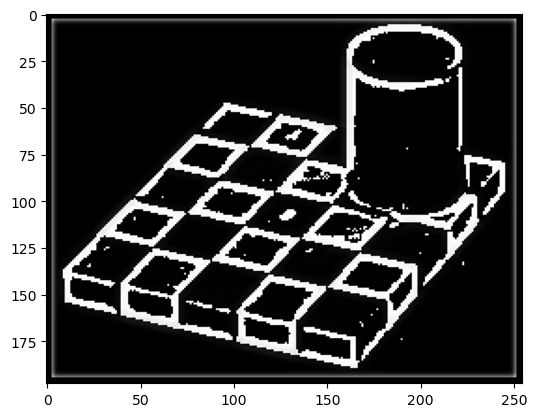

In [14]:
im1 = filtrer(damier[:,:,0],K)
im2 = filtrer(filtrer(filtrer(damier[:,:,0],K),K),K)
plt.imshow((im1 - im2),cmap="gray")